In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime


%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

In [4]:

''' Колонки '''
ticker = 'MPC'
# ticker = 'AAPL'


''' время '''
stime='1999-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df.tail(3)

,MPC
Date,
2022-11-01 00:00:00-04:00,121.052032
2022-12-01 00:00:00-05:00,116.389999
2023-01-01 00:00:00-05:00,121.769997


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,MPC
Date_index,
2011-07-01,15.423674
2011-08-01,13.053240
2011-09-01,9.582277


In [7]:
x = '2022'
y = int(x)+1
f'{y}-01-01'

'2023-01-01'

In [8]:
# df.loc['1999-01-01']

In [9]:
# df_st_gr = fa.financial_statement_growth(ticker, api_key, period='annual') #quarter 

In [10]:
# df_st_gr

In [11]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2021,FY,184.873652,15.004622,6.718028,4.46225,16.701079,40.379045,35.731895,40.379045,43.40678,46598202011.900002,68211202011.900002,4.785192,0.388373,10.687661,16.090539,1.77815,1.77815,0.568507,4.661464,15.644771,23.553592,0.208978,0.062148,0.988132,0.606655,1.477004,1.703878,3.393844,0.447731,0.031847,0.152393,0,0,0.121713,-0.33578,-0.012202,-0.435196,0,116.756701,0.063727,0.129871,-44.144838,12598000000,23190000000,-21296000000,1.026635,8397000000,10751500000,8027000000,33.566505,44.107011,25.932991,10.873935,8.275328,14.074736,0.371594,-2.255778
2020,FY,107.51772,-15.140216,3.727273,-0.567026,0.639445,34.204931,28.714946,34.204931,53.047766,28010839870.200001,60690839870.199997,-2.850686,0.401422,11.579512,-76.116413,1.261806,1.261806,0.869758,-8.040652,25.089227,-164.920761,-0.350793,-0.013138,1.33988,0.656497,-4.329624,1.805976,-9.187547,-0.246184,0.053908,-0.153674,0,0,0.124662,-1.152129,-0.03994,-0.825778,0,107.944781,-0.176229,-0.131818,-72.683359,12624000000,18636000000,-27619000000,1.490833,5760000000,7803000000,7999000000,30.129409,41.212233,42.247424,12.11441,8.856594,8.63958,-0.442633,-4.294299
2019,FY,188.086495,4.001517,14.326252,6.171472,2.317147,51.128983,29.091047,51.128983,45.638847,35816649011.5,63127649011.5,13.582347,0.288963,3.793735,8.806651,1.062998,1.062998,0.509303,7.351537,6.686543,15.52192,0.073625,0.113551,0.834778,0.572436,3.180505,1.249148,4.504039,3.580205,0.039032,0.530148,0.027495,0,0.233045,-0.569219,-0.043357,-1.477185,0,67.848023,0.067663,0.034886,-66.562215,4023000000,19171000000,-36247000000,0.855879,6816000000,9713000000,9121000000,23.181147,37.252878,32.82984,15.745554,9.797901,11.117934,0.078263,-8.15478


In [12]:
df_key_metr.index[0]

'2021'

In [13]:
df_key_metr = df_key_metr.loc['2022':'2000'].copy(deep=True)
index_years = df_key_metr.index.to_list()
index_years


['2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011']

In [14]:
# financial_ratios = fa.financial_ratios(ticker, api_key, period='annual')
# financial_ratios = financial_ratios.T
# financial_ratios

In [15]:
# df_fin_rat = financial_ratios
# df_fin_rat = df_fin_rat.loc['2022':'2000'].copy(deep=True)
# index_years = df_fin_rat.index.to_list()
# index_years

stock data detailed

In [16]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [17]:
# stock_data_det = fa.stock_data_detailed(ticker, api_key)
# stock_data_det

In [18]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_prices

[69.9295425415039,
 40.42247009277344,
 48.2541618347168,
 56.482059478759766,
 57.548336029052734,
 38.81203079223633,
 32.54951477050781,
 35.29023742675781,
 32.49885559082031,
 27.152122497558594,
 13.62435245513916]

In [19]:
df_key_metr[ticker] = list(stock_year_prices)

In [20]:
df_key_metr.drop('period', axis=1, inplace=True)

In [21]:
df_key_metr.tail(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,MPC
2013,158.984127,3.352381,5.404762,3.490476,3.638095,17.333333,16.498413,17.333333,5.655556,27562500000,28666500000,13.050426,0.275185,8.094714,12.534106,2.524038,2.524038,0.286207,6.215633,8.418943,13.036153,0.076626,0.079782,0.308883,0.600775,0.239376,1.296519,20.508982,1.612216,0.01756,0.229167,0.01246,0,0.033046,-0.354185,-0.012041,-0.988525,0,36.158382,0.184527,0.076948,-13.090873,2913000000,10394000000,-4316000000,0.310989,5659500000,8018500000,6344000000,20.257937,33.777001,19.234923,18.017629,10.80617,18.975901,0.193407,-1.914286,32.498856
2012,120.945588,4.983824,6.605882,4.592647,7.147059,17.197059,16.433824,17.197059,5.075,24782599795.999996,23283599795.999996,7.312659,0.301334,5.517052,7.935511,2.119258,2.119258,0.283107,3.684697,5.183348,7.455523,0.136749,0.126016,0.285788,0.555339,-0.237221,1.588321,59.411111,1.325465,0.016423,0.120094,0.014871,0,0.034162,-0.304764,-0.016646,-1.375879,0,43.913664,0.281125,0.128894,-7.464706,4826000000,11175000000,-2089000000,0.287412,5185000000,7294000000,5724000000,20.459492,35.407761,17.998728,17.84013,10.308475,20.279211,0.289807,-2.013235,27.152122
2011,110.546348,3.355337,4.647472,2.983146,4.324438,13.349719,12.167135,13.349719,4.730337,13342879857.6,13570879857.6,5.585132,0.169522,4.0323,6.281959,1.403775,1.403775,0.172418,2.905348,4.101203,6.389303,0.179047,0.159186,0.346344,0.630802,0.048812,1.251277,61.393443,1.385098,0.011991,0.066974,0.014052,0,0.032705,-0.358114,-0.015055,-1.329966,0,31.746467,0.231831,0.095932,-10.400632,2410000000,8663000000,-4239000000,0.347922,5610500000,7986000000,5659500000,25.324486,40.969592,16.650636,14.412928,8.909046,21.921084,0.251341,-1.664326,13.624352


In [22]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                if y != len(v):
                    vv = (v[y] / (v[y+1] / 100)) - 100
                    l.append(vv)
                    # print(vv)
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes = change_percent_all_columns(df_key_metr)

            

In [23]:
df_with_changes

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,MPC,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % MPC
2021,184.873652,15.004622,6.718028,4.46225,16.701079,40.379045,35.731895,40.379045,43.40678,46598202011.900002,68211202011.900002,4.785192,0.388373,10.687661,16.090539,1.77815,1.77815,0.568507,4.661464,15.644771,23.553592,0.208978,0.062148,0.988132,0.606655,1.477004,1.703878,3.393844,0.447731,0.031847,0.152393,0,0,0.121713,-0.33578,-0.012202,-0.435196,0,116.756701,0.063727,0.129871,-44.144838,12598000000,23190000000,-21296000000,1.026635,8397000000,10751500000,8027000000,33.566505,44.107011,25.932991,10.873935,8.275328,14.074736,0.371594,-2.255778,69.929543,71.947147,-199.104417,80.239768,-886.956522,2511.807229,18.050363,24.436574,18.050363,-18.174161,66.357747,12.391264,-267.861082,-3.250651,-7.701975,-121.139382,40.920996,40.920996,-34.636157,-157.973707,-37.643471,-114.281763,-159.573070,-573.050722,-26.252175,-7.592085,-134.113912,-5.653361,-136.939607,-281.868553,-40.923613,-199.166262,0.000000,0,-2.365941,-70.855710,-69.450146,-47.298631,0,8.163360,-136.161747,-198.522865,-39.264174,-0.205957,24.436574,-22.893660,-31.136809,45.781250,37.786749,0.350044,11.407780,7.024073,-38.616399,-10.239662,-6.563078,62.909959,-183.950964,-47.470398,72.996708
2020,107.51772,-15.140216,3.727273,-0.567026,0.639445,34.204931,28.714946,34.204931,53.047766,28010839870.200001,60690839870.199997,-2.850686,0.401422,11.579512,-76.116413,1.261806,1.261806,0.869758,-8.040652,25.089227,-164.920761,-0.350793,-0.013138,1.33988,0.656497,-4.329624,1.805976,-9.187547,

In [24]:
df_with_changes.columns.to_list()

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

Vizualization

In [25]:
df_with_changes = df_with_changes.reindex(index=df_with_changes.index[::-1])

In [26]:
# df_with_changes

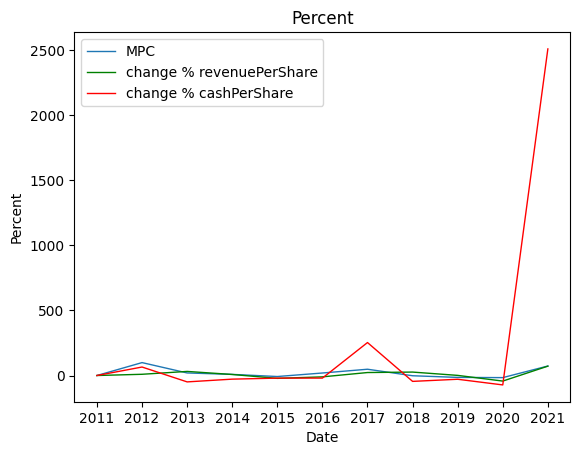

In [27]:
# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[x],'g',lw=1, label=x)
plt.plot(df_with_changes[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

In [28]:
	# change % netDebtToEBITDA	change % currentRatio

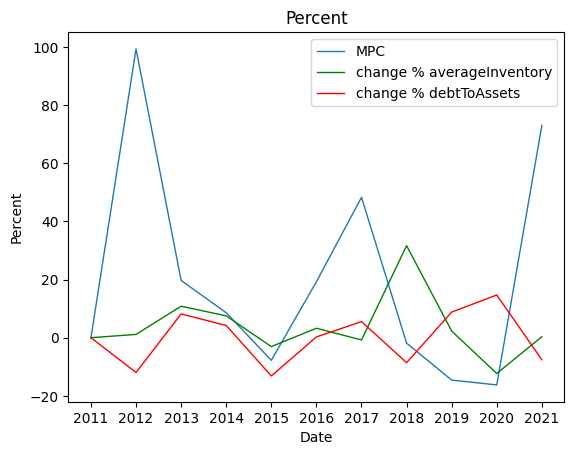

In [29]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z = 'change % averageInventory'
e = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z],'g',lw=1, label=z)
plt.plot(df_with_changes[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

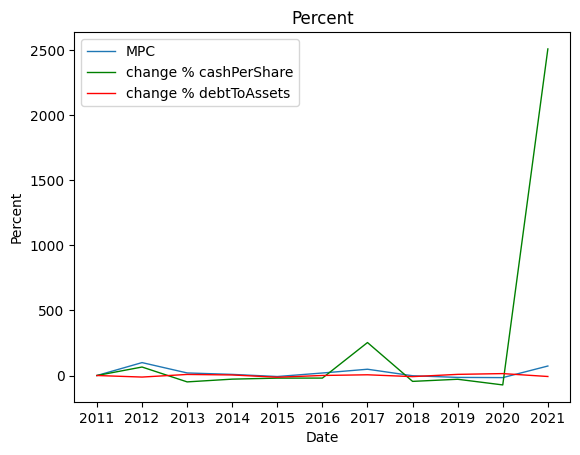

In [30]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()